2번

In [20]:
import numpy as np
from collections import Counter

# 샘플 데이터
data = np.array([
    [1, 180, 78, 'ω3'],
    [1, 167, 72, 'ω3'],
    [3, 160, 48, 'ω1'],
    [4, 155, 45, 'ω2'],
    [2, 170, 66, 'ω1'],
    [1, 168, 55, 'ω3'],
    [2, 178, 80, 'ω1'],
    [3, 158, 60, 'ω1']
])

# 클래스를 숫자로 변환
class_mapping = {'ω1': 1, 'ω2': 2, 'ω3': 3}
data[:, -1] = [class_mapping[class_label] for class_label in data[:, -1]]
data = data.astype(float)

# 초기 지니 불순도 계산
N_X_T = data.shape[0]
class_counts = Counter(data[:, -1])
p_T = np.array([class_counts[1], class_counts[2], class_counts[3]]) / N_X_T
im_of_gini = 1 - np.sum(p_T ** 2)

# 지니 불순도 계산 함수
def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        class_counts = Counter(group[:, -1])
        for class_val in classes:
            p = class_counts[class_val] / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

# 데이터셋 분할 함수
def split_dataset(data, question, is_equal):
    feature, value = question
    if is_equal:
        left = data[data[:, feature] == value]
        right = data[data[:, feature] != value]
    else:
        left = data[data[:, feature] <= value]
        right = data[data[:, feature] > value]
    return left, right

# 각 질문에 대한 지니 불순도 계산
def find_best_question(data, feature_range, feature_index, classes, question_format, is_equal=False):
    best_delta_im = -float('inf')
    best_question = None
    delta_im_results = []
    for value in feature_range:
        left, right = split_dataset(data, (feature_index, value), is_equal)
        gini = gini_index([left, right], classes)
        delta_im = im_of_gini - gini
        formatted_question = question_format.format(value)
        delta_im_results.append((formatted_question, delta_im))
        if delta_im > best_delta_im:
            best_delta_im = delta_im
            best_question = formatted_question
    return best_question, best_delta_im, delta_im_results

classes = np.unique(data[:, -1])

# x1: 혈액형에 대한 최적의 질문
q_x1 = np.arange(4) + 1
best_x1_question, best_x1_delta_im, x1_results = find_best_question(data, q_x1, 0, classes, 'x1 == {}?', is_equal=True)

# x2: 키에 대한 최적의 질문
q_x2 = (np.unique(data[:, 1])[:-1] + np.unique(data[:, 1])[1:]) / 2
best_x2_question, best_x2_delta_im, x2_results = find_best_question(data, q_x2, 1, classes, 'x2 < {}?')

# x3: 몸무게에 대한 최적의 질문
q_x3 = (np.unique(data[:, 2])[:-1] + np.unique(data[:, 2])[1:]) / 2
best_x3_question, best_x3_delta_im, x3_results = find_best_question(data, q_x3, 2, classes, 'x3 < {}?')

# 결과 출력
print("불순도 감소량 (각 질문별):")
print("\n혈액형 (x1):")
for question, delta_im in x1_results:
    print(f"{question} : {delta_im}")
print("\n키 (x2):")
for question, delta_im in x2_results:
    print(f"{question} : {delta_im}")
print("\n몸무게 (x3):")
for question, delta_im in x3_results:
    print(f"{question} : {delta_im}")

print(f"\n최적의 질문:")
print(f"x1 최적의 질문: {best_x1_question}, 불순도 감소량: {best_x1_delta_im}")
print(f"x2 최적의 질문: {best_x2_question}, 불순도 감소량: {best_x2_delta_im}")
print(f"x3 최적의 질문: {best_x3_question}, 불순도 감소량: {best_x3_delta_im}")


불순도 감소량 (각 질문별):

혈액형 (x1):
x1 == 1? : 0.3937500000000001
x1 == 2? : 0.13541666666666663
x1 == 3? : 0.13541666666666663
x1 == 4? : 0.16517857142857134

키 (x2):
x2 < 156.5? : 0.16517857142857134
x2 < 159.0? : 0.09375
x2 < 163.5? : 0.12708333333333333
x2 < 167.5? : 0.03125
x2 < 169.0? : 0.02708333333333346
x2 < 174.0? : 0.01041666666666663
x2 < 179.0? : 0.09375

몸무게 (x3):
x3 < 46.5? : 0.16517857142857134
x3 < 51.5? : 0.09375
x3 < 57.5? : 0.043749999999999956
x3 < 63.0? : 0.03125
x3 < 69.0? : 0.07708333333333339
x3 < 75.0? : 0.01041666666666663
x3 < 79.0? : 0.0580357142857143

최적의 질문:
x1 최적의 질문: x1 == 1?, 불순도 감소량: 0.3937500000000001
x2 최적의 질문: x2 < 156.5?, 불순도 감소량: 0.16517857142857134
x3 최적의 질문: x3 < 46.5?, 불순도 감소량: 0.16517857142857134


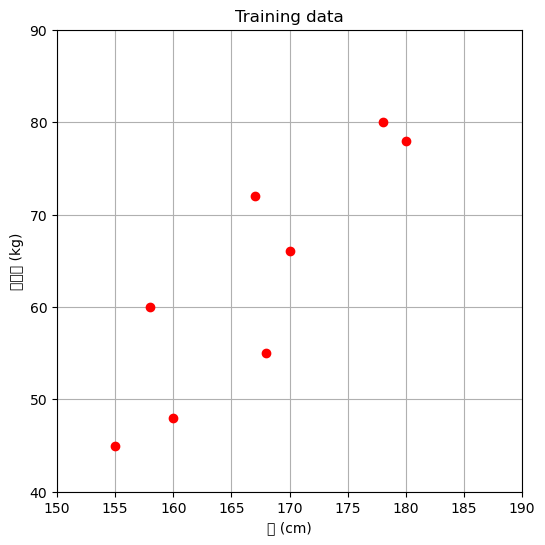

Mean: [167.  63.]
Covariance: [[ 71.75   91.375]
 [ 91.375 153.25 ]]
Eigenvalue: [ 12.45024675 212.54975325]
Eigenvector: [[-0.83883769 -0.5443816 ]
 [ 0.5443816  -0.83883769]]

===== Unit vector about large eigenvalue =====
Unit vector: [[-0.5443816  -0.83883769]]
Feature vector with PCA: [[-19.65952617  -7.54953925  16.39323659  21.63165766  -4.14965787
    6.16631996 -20.24843836   7.41594745]]
Variance of feature vector with PCA: 212.54975324807157
Projected Feature vector: [[177.70228423 171.10983023 158.0758237  155.22412369 169.25899737
  163.6431689  178.02287719 162.96289469]
 [ 79.49115161  69.3328381   49.24873521  44.85455016  66.48088944
   57.82745838  79.98515336  56.77922374]]


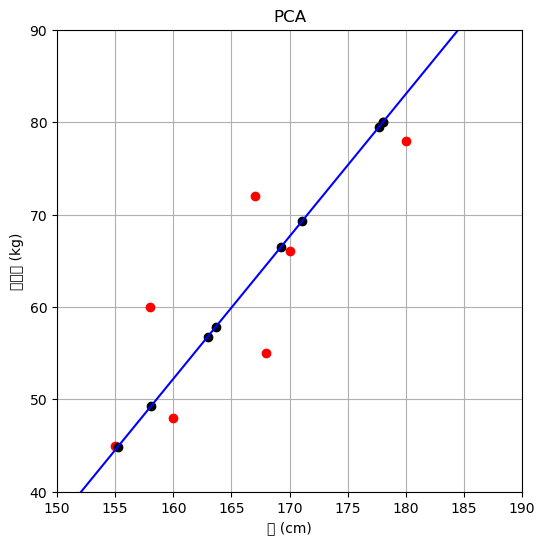


===== Unit vector about small eigenvalue =====
Unit vector: [[-0.83883769  0.5443816 ]]
Feature vector with PCA: [[-2.7391661   4.89943436 -2.29386007  0.26718361 -0.8833683  -5.19389046
   0.02727249  5.91639447]]
Variance of feature vector with PCA: 12.45024675192847
Projected Feature vector: [[169.29771577 162.89016977 168.9241763  166.77587631 167.74100263
  171.3568311  166.97712281 162.03710531]
 [ 61.50884839  65.6671619   61.75126479  63.14544984  62.51911056
   60.17254162  63.01484664  66.22077626]]


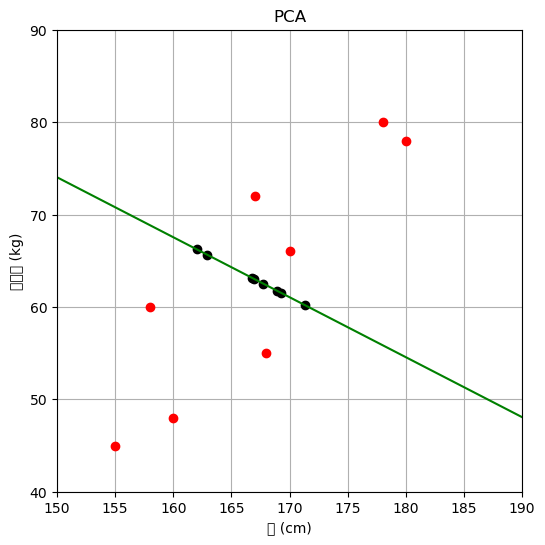

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 (x2: 키, x3: 몸무게)
data = np.array([
    [180, 78],
    [167, 72],
    [160, 48],
    [155, 45],
    [170, 66],
    [168, 55],
    [178, 80],
    [158, 60]
])

# 데이터 시각화
plt.figure(figsize=(6, 6))
plt.title("Training data")
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.axis([150, 190, 40, 90])
plt.grid(True)
plt.show()

# 데이터의 평균과 공분산 구하기
x_mean = data.mean(axis=0)
x_var = np.cov(data.T, ddof=0)

print('Mean:', x_mean)
print('Covariance:', x_var)

# 공분산 행렬의 고유값과 고유벡터 구하기
Elambda, Eu = np.linalg.eig(x_var)

print('Eigenvalue:', Elambda)
print('Eigenvector:', Eu)

# 큰 고유값에 대한 단위 벡터
print('\n===== Unit vector about large eigenvalue =====')
u_for_PCA = np.array([Eu[:, np.argmax(Elambda)]])
print('Unit vector:', u_for_PCA)

# 데이터의 평균을 원점으로 이동
data_centered = data - x_mean

# PCA를 통한 특징 벡터 구하기
Feature_vec_PCA = u_for_PCA @ data_centered.T
print('Feature vector with PCA:', Feature_vec_PCA)

# 특징 벡터의 분산
Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('Variance of feature vector with PCA:', Feature_vec_PCA_var)

# 투영 행렬과 투영된 특징 벡터 구하기
P_matrix = u_for_PCA.T @ u_for_PCA
Projected_Feature_vec = P_matrix @ data_centered.T
Projected_Feature_vec = Projected_Feature_vec + x_mean[:, np.newaxis]
print('Projected Feature vector:', Projected_Feature_vec)

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.title("PCA")
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(Projected_Feature_vec[0, :], Projected_Feature_vec[1, :], 'ko')
# 주 성분 방향을 따라 직선 그리기
slope = u_for_PCA[0,1]/u_for_PCA[0,0]
intercept = x_mean[1] - slope * x_mean[0]
t = np.linspace(150, 190, 400)
plt.plot(t, slope * t + intercept, 'b-')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.axis([150, 190, 40, 90])
plt.grid(True)
plt.show()

# 작은 고유값에 대한 단위 벡터
print('\n===== Unit vector about small eigenvalue =====')
u_for_PCA = np.array([Eu[:, np.argmin(Elambda)]])
print('Unit vector:', u_for_PCA)

# PCA를 통한 특징 벡터 구하기
Feature_vec_PCA = u_for_PCA @ data_centered.T
print('Feature vector with PCA:', Feature_vec_PCA)

# 특징 벡터의 분산
Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('Variance of feature vector with PCA:', Feature_vec_PCA_var)

# 투영 행렬과 투영된 특징 벡터 구하기
P_matrix = u_for_PCA.T @ u_for_PCA
Projected_Feature_vec = P_matrix @ data_centered.T
Projected_Feature_vec = Projected_Feature_vec + x_mean[:, np.newaxis]
print('Projected Feature vector:', Projected_Feature_vec)

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.title("PCA")
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(Projected_Feature_vec[0, :], Projected_Feature_vec[1, :], 'ko')
# 작은 고유값 방향을 따라 직선 그리기
slope = u_for_PCA[0,1]/u_for_PCA[0,0]
intercept = x_mean[1] - slope * x_mean[0]
t = np.linspace(150, 190, 400)
plt.plot(t, slope * t + intercept, 'g-')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.axis([150, 190, 40, 90])
plt.grid(True)
plt.show()


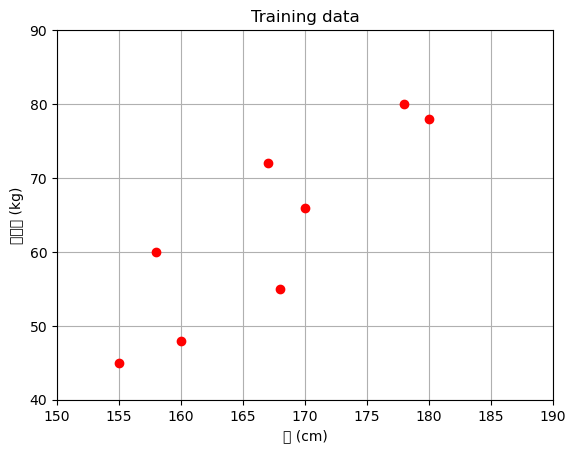

Mean: [167.  63.]
Covariance: [[ 71.75   91.375]
 [ 91.375 153.25 ]]
Eigenvalue: [ 12.45024675 212.54975325]
Eigenvector: [[-0.83883769 -0.5443816 ]
 [ 0.5443816  -0.83883769]]

===== Unit vector about large eigenvalue =====
Unit vector: [[-0.5443816  -0.83883769]]
Feature vector with PCA: [[-19.65952617  -7.54953925  16.39323659  21.63165766  -4.14965787
    6.16631996 -20.24843836   7.41594745]]
Variance of feature vector with PCA: 212.54975324807157
Projected Feature vector: [[177.70228423 171.10983023 158.0758237  155.22412369 169.25899737
  163.6431689  178.02287719 162.96289469]
 [ 79.49115161  69.3328381   49.24873521  44.85455016  66.48088944
   57.82745838  79.98515336  56.77922374]]


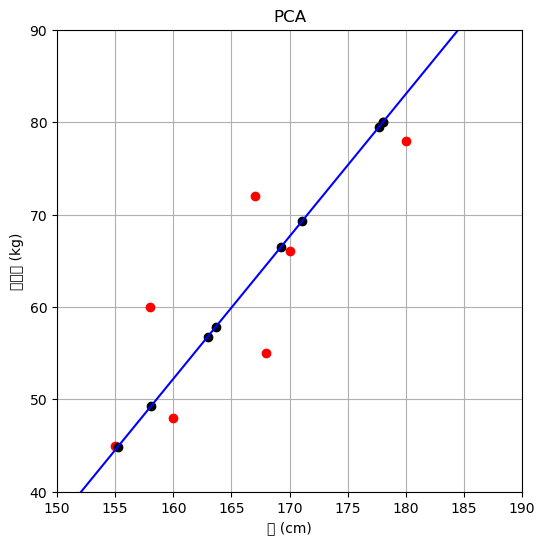


===== Unit vector about small eigenvalue =====
Unit vector: [[-0.83883769  0.5443816 ]]
Feature vector with PCA: [[-2.7391661   4.89943436 -2.29386007  0.26718361 -0.8833683  -5.19389046
   0.02727249  5.91639447]]
Variance of feature vector with PCA: 12.45024675192847
Projected Feature vector: [[169.29771577 162.89016977 168.9241763  166.77587631 167.74100263
  171.3568311  166.97712281 162.03710531]
 [ 61.50884839  65.6671619   61.75126479  63.14544984  62.51911056
   60.17254162  63.01484664  66.22077626]]


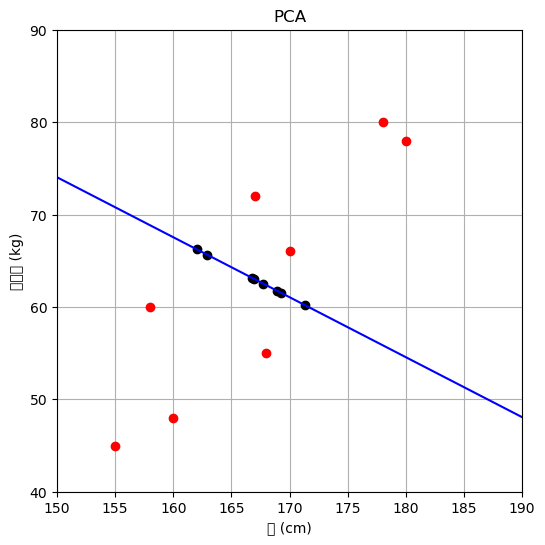

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 (x2: 키, x3: 몸무게)
data = np.array([
    [180, 78],
    [167, 72],
    [160, 48],
    [155, 45],
    [170, 66],
    [168, 55],
    [178, 80],
    [158, 60]
])

# 데이터 시각화
plt.title("Training data")
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.axis([150, 190, 40, 90])
plt.grid(True)
plt.show()

# 데이터의 평균과 공분산 구하기
x_mean = data.mean(axis=0)
x_var = np.cov(data.T, ddof=0)

print('Mean:', x_mean)
print('Covariance:', x_var)

# 공분산 행렬의 고유값과 고유벡터 구하기
Elambda, Eu = np.linalg.eig(x_var)

print('Eigenvalue:', Elambda)
print('Eigenvector:', Eu)

# 큰 고유값에 대한 단위 벡터
print('\n===== Unit vector about large eigenvalue =====')
u_for_PCA = np.array([Eu[:, 1]])  # 예제와 동일하게 두 번째 고유벡터를 사용
print('Unit vector:', u_for_PCA)


# PCA를 통한 특징 벡터 구하기
Feature_vec_PCA = u_for_PCA @ data.T
print('Feature vector with PCA:', Feature_vec_PCA)

# 특징 벡터의 분산
Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('Variance of feature vector with PCA:', Feature_vec_PCA_var)

# 투영 행렬과 투영된 특징 벡터 구하기
P_matrix = u_for_PCA.T @ u_for_PCA
Projected_Feature_vec = P_matrix @ data.T
print('Projected Feature vector:', Projected_Feature_vec)

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.title("PCA")
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(Projected_Feature_vec[0, :], Projected_Feature_vec[1, :], 'ko')
# 주 성분 방향을 따라 직선 그리기
slope = u_for_PCA[0,1] / u_for_PCA[0,0]
t = np.linspace(150, 190, 400)
plt.plot(t, slope * t, 'b-')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.axis([150, 190, 40, 90])
plt.grid(True)
plt.show()

# 작은 고유값에 대한 단위 벡터
print('\n===== Unit vector about small eigenvalue =====')
u_for_PCA = np.array([Eu[:, 0]])  # 예제와 동일하게 첫 번째 고유벡터를 사용
print('Unit vector:', u_for_PCA)

# PCA를 통한 특징 벡터 구하기
Feature_vec_PCA = u_for_PCA @ data.T
print('Feature vector with PCA:', Feature_vec_PCA)

# 특징 벡터의 분산
Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('Variance of feature vector with PCA:', Feature_vec_PCA_var)

# 투영 행렬과 투영된 특징 벡터 구하기
P_matrix = u_for_PCA.T @ u_for_PCA
Projected_Feature_vec = P_matrix @ data.T
print('Projected Feature vector:', Projected_Feature_vec)

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.title("PCA")
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(Projected_Feature_vec[0, :], Projected_Feature_vec[1, :], 'ko')
# 작은 고유값 방향을 따라 직선 그리기
slope = u_for_PCA[0,1] / u_for_PCA[0,0]
t = np.linspace(150, 190, 400)
plt.plot(t, slope * t , 'b-')
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.axis([150, 190, 40, 90])
plt.grid(True)
plt.show()
